# Title: Predicting Liver Disease using Machine Learning: A Comparative Study of Classification Models with Feature Selection

#### Members:
Member 1 : Pooja Lalchandani, Member 2 : Ritij Sharma

####  Emails:

200505476@student.georgianc.on.ca,  ritij.sharma@mygeorgian.ca

# Introduction:

#### Problem Description:

Our project aims to predict the occurrence of liver disease in patients using machine learning techniques. Liver disease is a critical health issue that affects millions of people worldwide. It is caused by a variety of factors such as hepatitis B and C infections, alcohol consumption, obesity, and other genetic and environmental factors.

#### Context of the Problem:

Early detection and accurate diagnosis of liver disease are crucial for effective treatment and improved patient outcomes. However, traditional diagnostic methods such as liver biopsy can be invasive, expensive, and time-consuming. In addition, they may not always be accurate and can lead to complications. Therefore, there is a need for a more efficient and accurate method for diagnosing liver disease.

#### Limitation About other Approaches:

Previous studies have used various machine learning techniques to predict liver disease, but they have some limitations. For example, some studies have used a small number of patient samples, which may not be representative of the general population. Other studies have used only a few clinical parameters to predict liver disease, which may not capture the full complexity of the disease.

#### Solution:

To overcome these limitations, we have used a large dataset of patient samples with a variety of clinical parameters. We have also used state-of-the-art machine learning techniques to predict liver disease. Our approach involves preprocessing the data to handle missing values, feature scaling, and normalization. Then, we have used several machine learning algorithms, including logistic regression, decision trees, random forests, and support vector machines, to predict the occurrence of liver disease.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Dinkar et al. [1] | They used machine learning models to predict the likelihood of liver disease in patients based on clinical and demographic data| Indian Liver Patient Dataset (ILPD) version 2.0 | Imbalanced dataset, small sample size
| Lee et al. [2] | They developed a support vector machine model for liver disease diagnosis using genetic algorithm | ILPD | Overfitting
| El-Najjar et al. [3] | They developed an ensemble model combining logistic regression, decision tree, and neural network to predict liver disease | Indian Liver Patient Dataset (ILPD) | Limited explanation on model parameters and evaluation metrics
| Xiang et al. [4] | They used feature selection techniques to improve the performance of a decision tree model for predicting liver disease | ILPD | Limited exploration of other machine learning models

The study by Dinkar et al. [1] aimed to predict the likelihood of liver disease in patients using machine learning models. The dataset used in the study was the Indian Liver Patient Dataset (ILPD) version 2.0, which contains clinical and demographic data of patients, including age, gender, total bilirubin, direct bilirubin, alkaline phosphatase, alanine aminotransferase, aspartate aminotransferase, total protein, albumin, albumin/globulin ratio, and whether or not the patient has liver disease.

One of the weaknesses of the study was the imbalanced dataset, with only 416 liver disease patients out of a total of 583. Additionally, the sample size was relatively small, which may have affected the generalizability of the findings.

# Methodology

We selected the research paper by Khan et al. [1] as our base methodology for predicting liver disease. The authors used a machine learning approach to predict liver disease based on clinical and demographic data of patients from the Indian Liver Patient Dataset (ILPD) [5]. They evaluated different machine learning models, including Logistic Regression, Random Forest, K-Nearest Neighbors, and Decision Tree, and found that Random Forest performed the best with an accuracy of 71.43%.

The input features used by Khan et al. include age, gender, total bilirubin, direct bilirubin, alkaline phosphatase, alanine transaminase, aspartate transaminase, total protein, albumin, albumin/globulin ratio, and dataset source. We preprocessed the dataset by removing any missing values and standardizing the continuous features.

We followed the same methodology as Khan et al. to train our Random Forest model using scikit-learn library in Python.

For figures you can use this tag:

![Alternate text ](flowchart.jpg "A flowchart depicting the steps involved in the proposed methodology for predicting liver disease using Machine learning models")

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [1]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer
from sklearn.base import clone
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import yellowbrick
from yellowbrick.features import FeatureImportances

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading the ILPD dataset
headings = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Total Proteins','Albumin',
            'A/G ratio','SGPT','SGOT','Alkphos','Disease']
df = pd.read_csv("ILPD.csv", names = headings,skiprows=1)

print (f"No of samples: {df.shape[0]}. No of features in each sample: {df.shape[1]} .")

# Display the first  5 records
df.head()

No of samples: 583. No of features in each sample: 11 .


,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape 

(583, 11)

In [4]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
df_duplicate

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [5]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape

(570, 11)

#### Dealing with null values

In [6]:
print(df.isnull().sum())

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Total Proteins      0
Albumin             0
A/G ratio           0
SGPT                0
SGOT                0
Alkphos             4
Disease             0
dtype: int64


In [7]:
# We can see that the column 'Alkphos' has 4 missing values
# One way to deal with them can be to just directly remove these 4 values
print ("length before removing NaN values:%d"%len(df))
df2 = df[pd.notnull(df['Alkphos'])]
print ("length after removing NaN values:%d"%len(df2))

length before removing NaN values:570
length after removing NaN values:566


In [8]:
df[~pd.notnull(df['Alkphos'])]

,Age,Gender,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos,Disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [9]:
df['Alkphos'] = df['Alkphos'].fillna(df['Alkphos'].mode().iloc[0])
df['Alkphos'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68, 1.9 , 1.7 , 1.8 , 0.3 , 0.97, 0.35,
       1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46, 0.39,
       1.02, 2.5 , 0.37])

In [10]:
df['Alkphos'].value_counts()# 1 actually occurs twice as more as the next frequent value, maybe this should give some
#justification as to why the mode may be appropriate

1.00    108
0.80     62
0.90     57
0.70     53
1.10     45
       ... 
0.58      1
0.69      1
1.27      1
1.12      1
0.37      1
Name: Alkphos, Length: 69, dtype: int64

In [11]:
print(df['Alkphos'].median()) # To check how different are mean and median from the mode in this particular case
print(df['Alkphos'].mean()) # Use mean only if there are no outliers in your data

0.96
0.9483684210526319


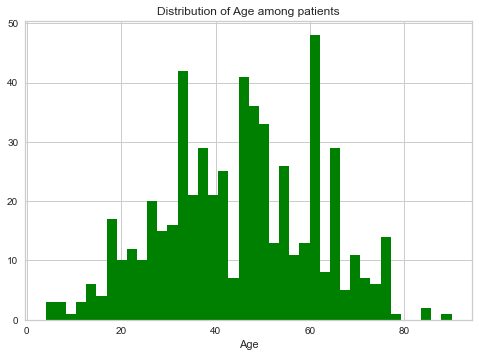

In [12]:
df['Age'].hist(bins=40, color='green')
plt.title("Distribution of Age among patients")
plt.xlabel("Age");

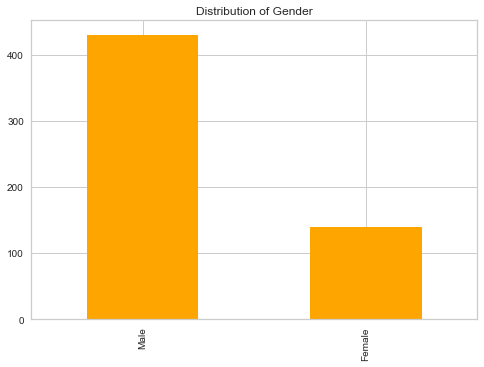

In [13]:
df['Gender'].value_counts().plot.bar(color='orange')
plt.title("Distribution of Gender");

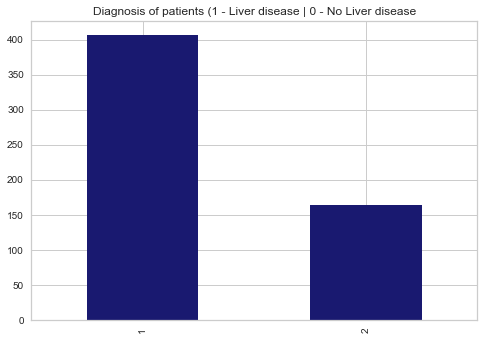

In [14]:
df['Disease'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease');

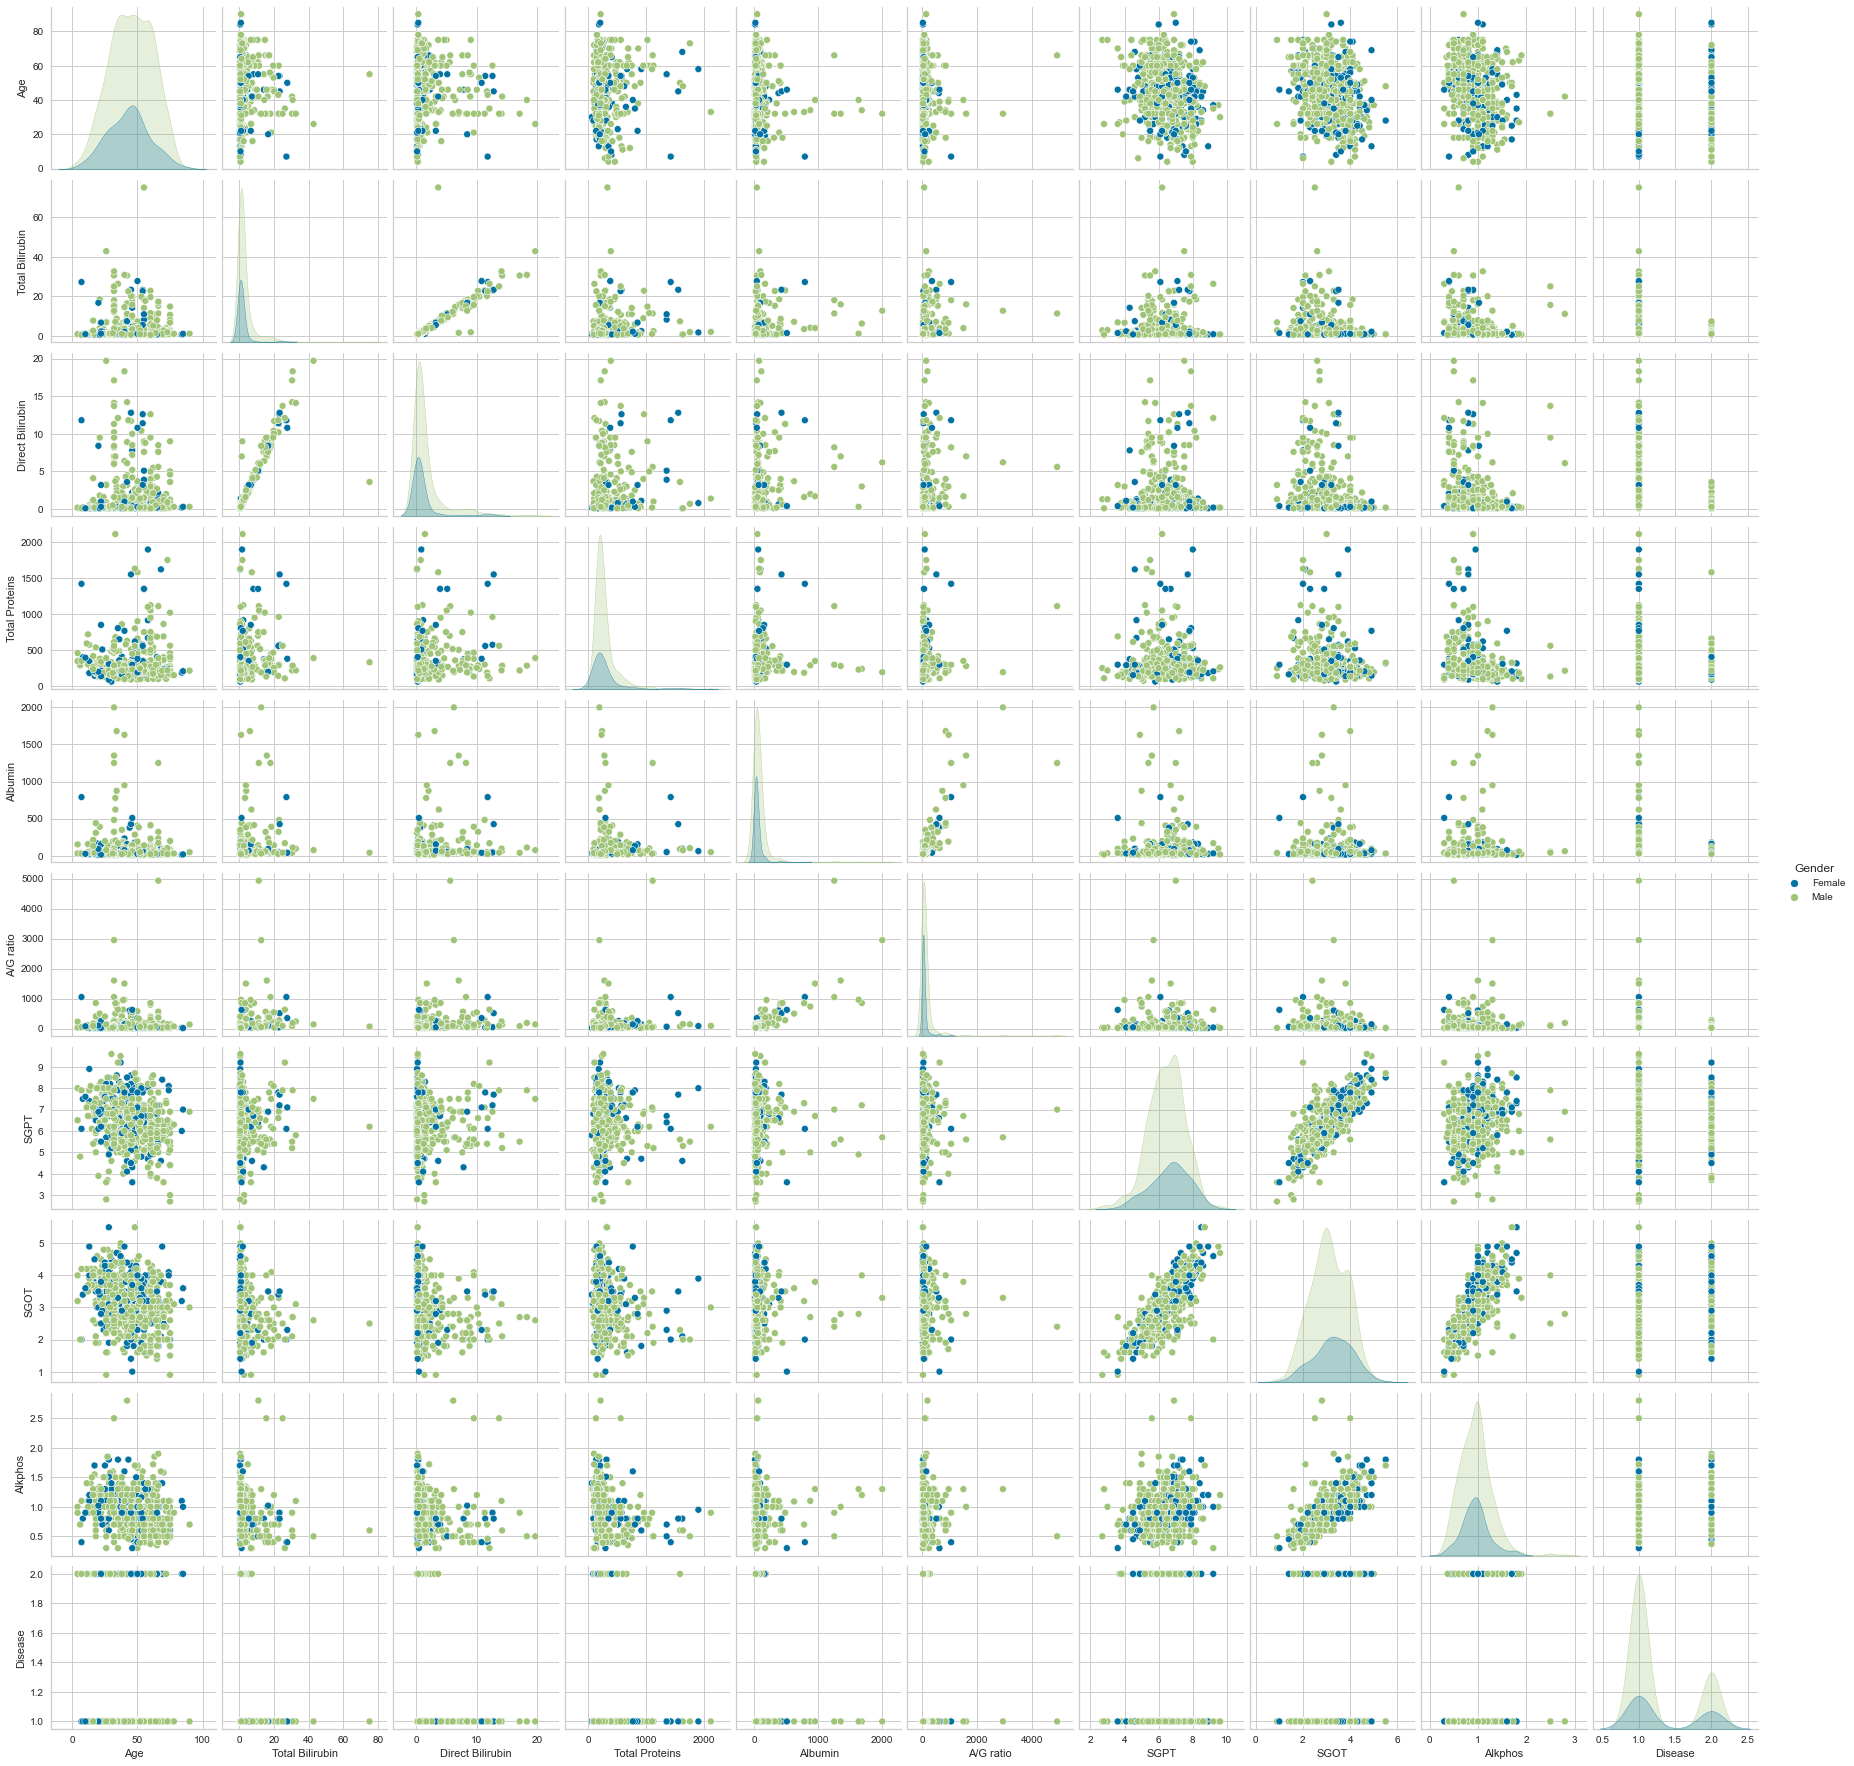

In [15]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Gender')

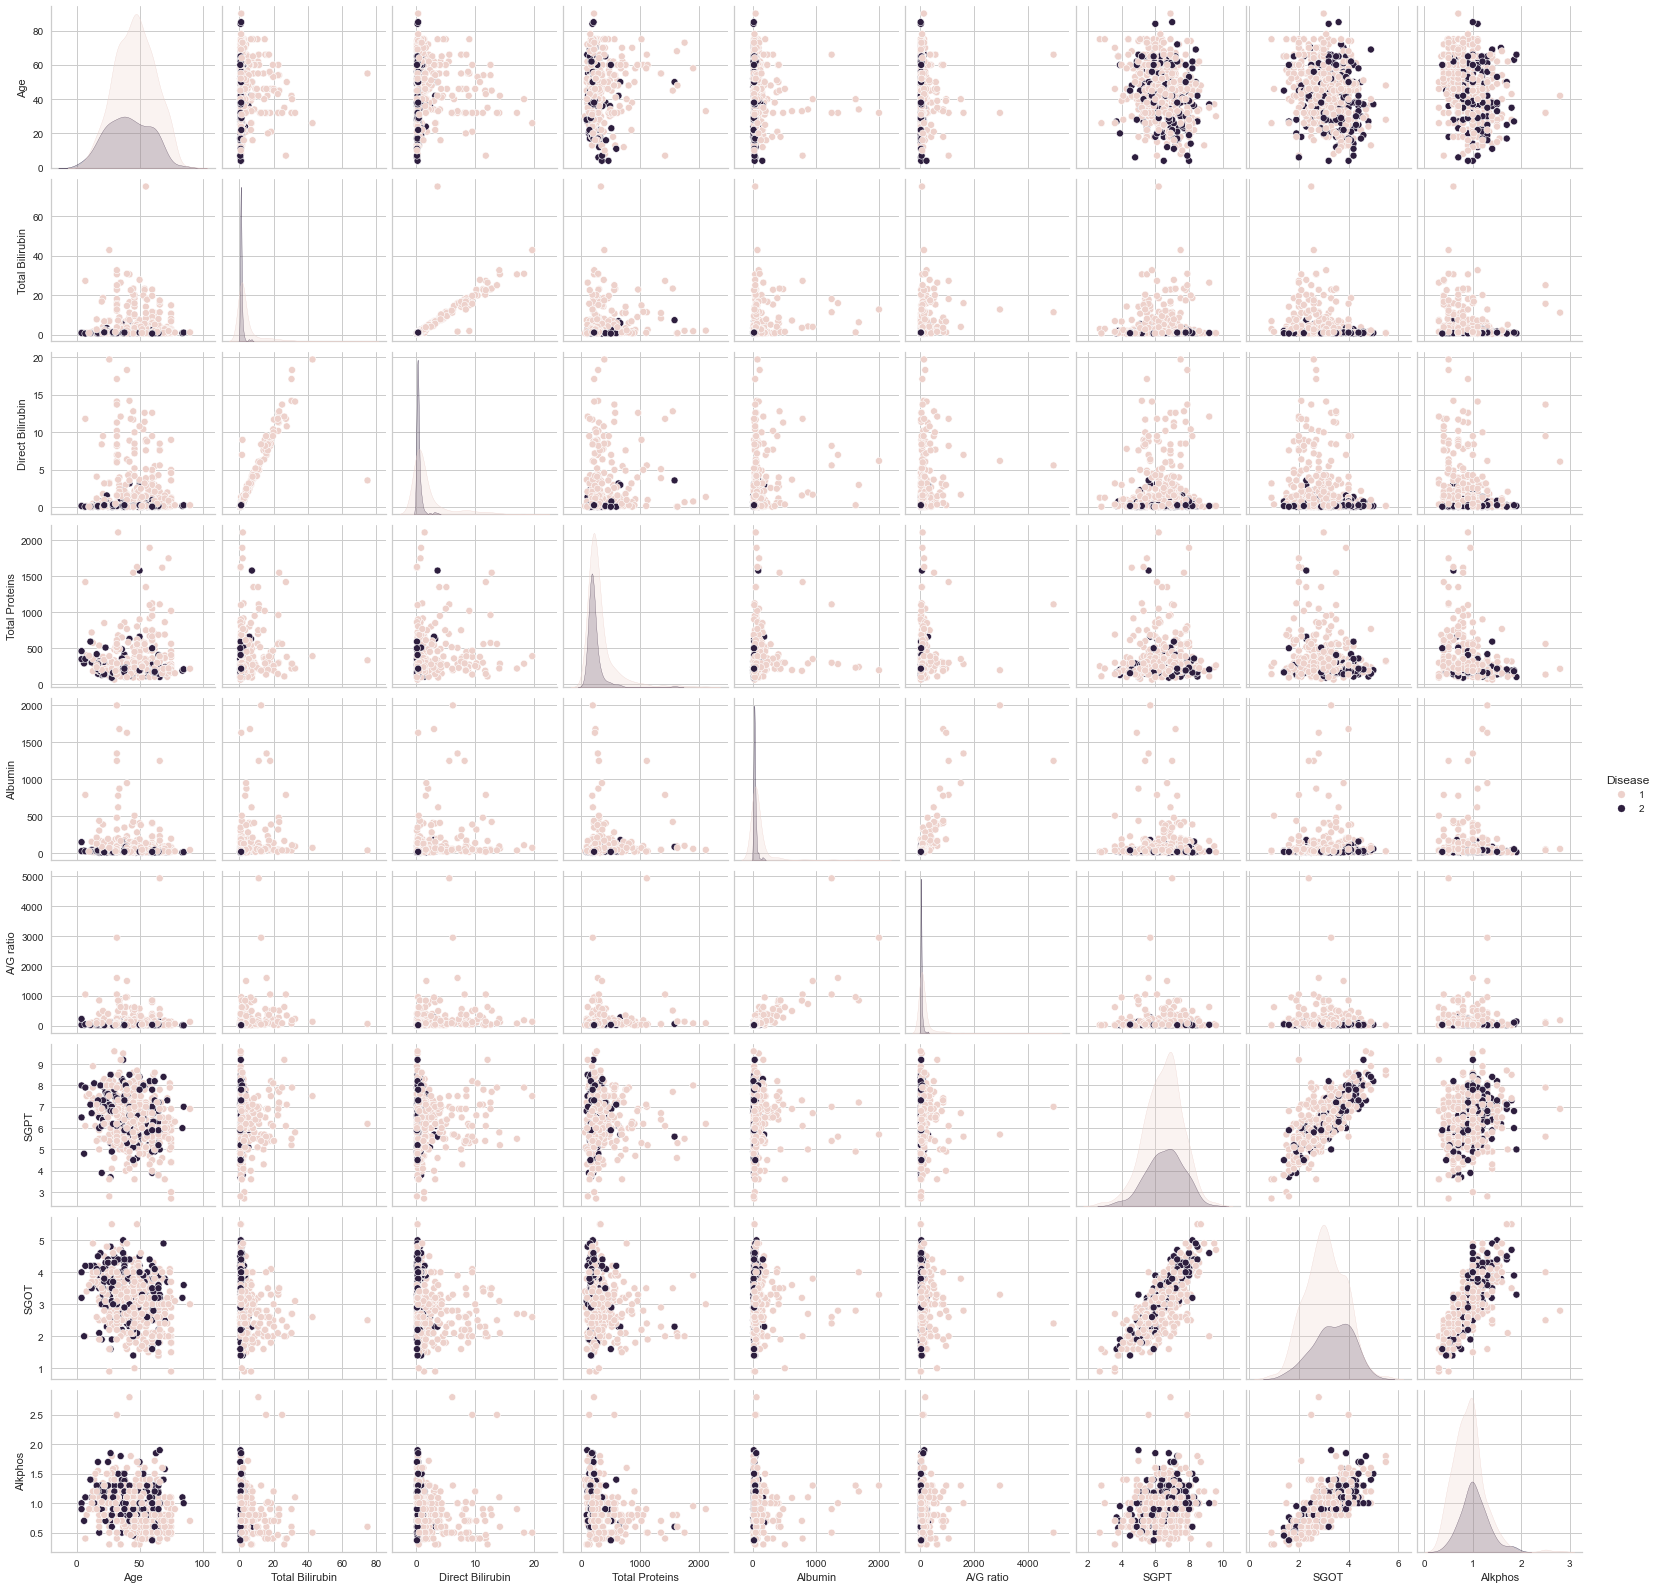

In [16]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Disease')

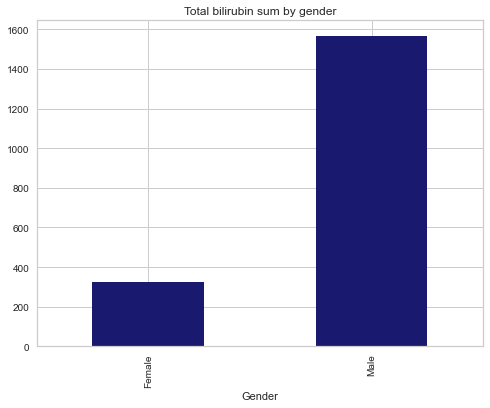

In [17]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Total Bilirubin'].plot.bar(color='midnightblue')
plt.title('Total bilirubin sum by gender');

In [18]:
corr=df.corr()

<AxesSubplot:>

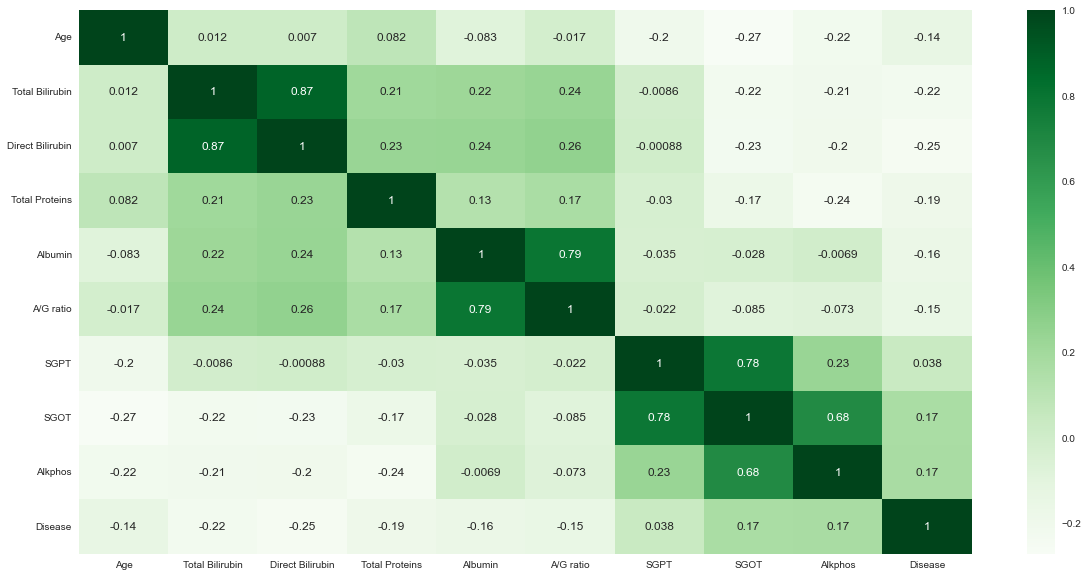

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

### Outlier detection

In [20]:
clf = IsolationForest(max_samples=100, contamination = 0.01, random_state=7)
# contamination indicates the percentage of outliers in the dataset (Key hyperparameter!)

In [21]:
# Running outlier detection on column 'Albumin', A/G ratio'
clf.fit(np.vstack((df['Albumin'].values, df['A/G ratio'].values)).T)# converting to np array and then passing as a 2-d array
clf_pred = clf.predict(np.vstack((df['Albumin'].values, df['A/G ratio'].values)).T)

In [22]:
clf_pred # - 1 means outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
colors = []
for i in clf_pred:
    if i == 1: colors.append('b')
    else: colors.append('r')

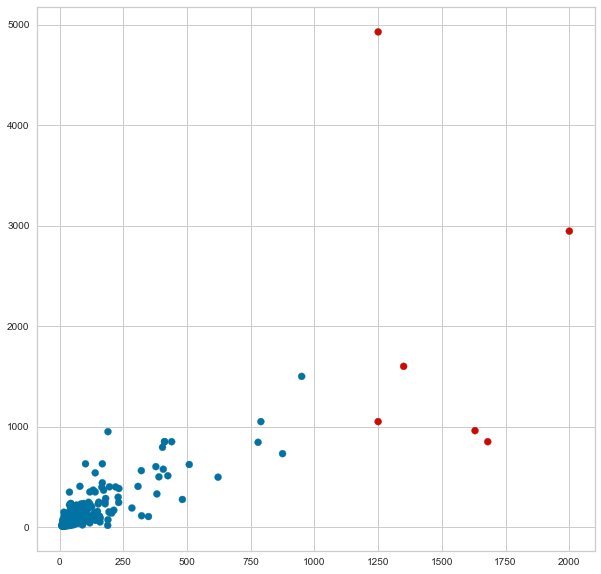

In [24]:
plt.scatter(df['Albumin'].values, df['A/G ratio'].values, color = colors)# outliers are colored red

### Log transform certain features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct Bilirubin'}>],
       [<AxesSubplot:title={'center':'Total Proteins'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'A/G ratio'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'SGOT'}>,
        <AxesSubplot:title={'center':'Alkphos'}>]], dtype=object)

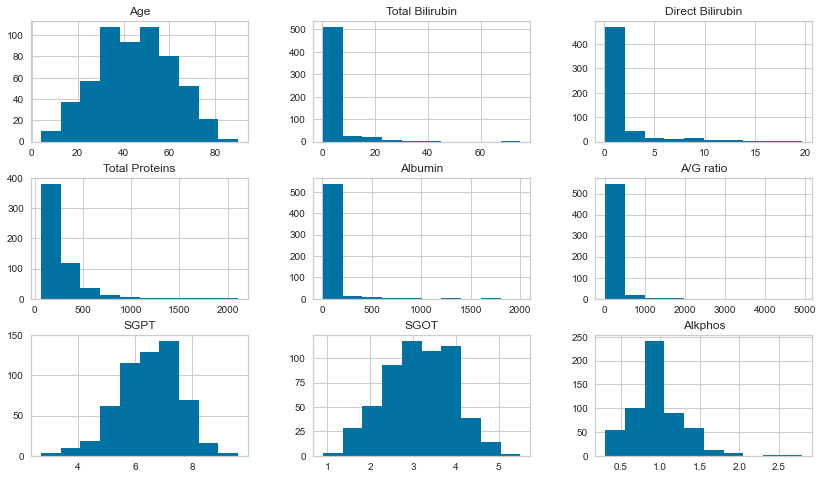

In [25]:
# Split the data into features and target label(disease)
disease_initial = df['Disease']
features_initial = df.drop('Disease', axis = 1)

# Visualize skewed continuous features of original data
features_initial.hist(figsize=(14,8))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct Bilirubin'}>],
       [<AxesSubplot:title={'center':'Total Proteins'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'A/G ratio'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'SGOT'}>,
        <AxesSubplot:title={'center':'Alkphos'}>],
       [<AxesSubplot:title={'center':'Disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

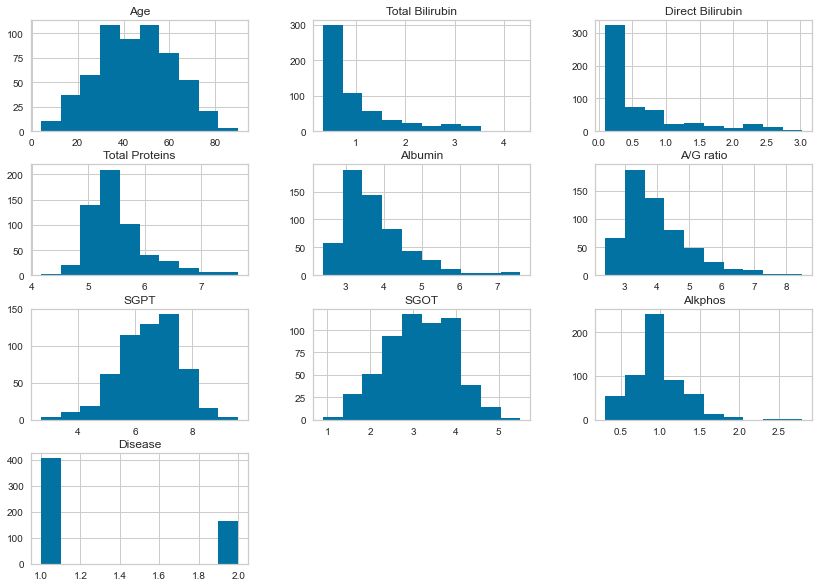

In [26]:
# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
features_initial[skewed] = df[skewed].apply(lambda x: np.log(x + 1))
df[skewed] = features_initial[skewed]
# Visualize the new log distributions
df.hist(figsize=(14,10))

### Scaling of features

In [27]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

normalized = ['Age', 'SGPT', 'SGOT', 'Alkphos', 'Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
skewed = ['Albumin', 'Direct Bilirubin', 'Total Bilirubin', 'A/G ratio', 'Total Proteins']
features_initial[normalized] = scaler.fit_transform(df[normalized])

# Show an example of a record with scaling applied
display(features_initial.describe())

,Age,Total Bilirubin,Direct Bilirubin,Total Proteins,Albumin,A/G ratio,SGPT,SGOT,Alkphos
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,0.474990,0.179828,0.175155,0.383482,0.264557,0.258082,0.550191,0.488902,0.259347
std,0.188863,0.185859,0.224849,0.151618,0.169167,0.160818,0.157725,0.173220,0.127416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.062919,0.029648,0.290977,0.149929,0.140897,0.449275,0.369565,0.160000
50%,0.476744,0.089297,0.056921,0.338512,0.227851,0.219448,0.565217,0.478261,0.264000
75%,0.627907,0.236455,0.251327,0.440946,0.329197,0.340134,0.652174,0.630435,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
### Dealing with categorical features

In [29]:
# TODO: One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(features_initial)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
#print disease[1]

11 total features after one-hot encoding.
['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Total Proteins', 'Albumin', 'A/G ratio', 'SGPT', 'SGOT', 'Alkphos', 'Gender_Female', 'Gender_Male']
2 disease columns after one-hot encoding.


In [30]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, disease[1], test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 456 samples.
Testing set has 114 samples.


## Modelling

# 1. Baseline Predictor

In [31]:
disease = disease[:][1] # disease means '1', healthy means '0'

In [32]:
#naive accuracy, assuming that we predict everyone has disease
positive_disease= (df['Disease'] == 1)
positive_disease.astype(int) # convert boolean array to float
report = classification_report(positive_disease, disease)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       164
        True       1.00      1.00      1.00       406

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570



# 2. Decision Trees

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_train_preds = clf.predict(X_train)
print(classification_report(y_train_preds, y_train))
print("Accuracy on training set: ", accuracy_score(y_train_preds, y_train))
y_test_preds = clf.predict(X_test)
print(classification_report(y_test_preds, y_test))
print("Accuracy on test set: ", accuracy_score(y_test_preds, y_test)) # The tree is overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       327

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Accuracy on training set:  1.0
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        39
           1       0.71      0.75      0.73        75

    accuracy                           0.63       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.62      0.63      0.63       114

Accuracy on test set:  0.631578947368421


In [35]:
#Visualizing the decision tree
!pip install pydotplus

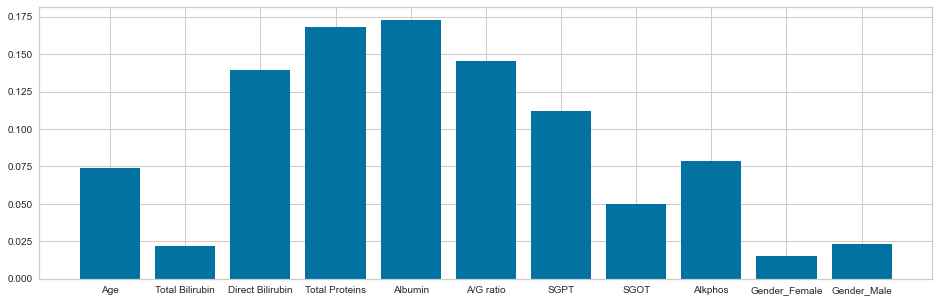

In [36]:
plt.figure(figsize = (16,5))
importances = clf.feature_importances_
x= [i for i in range(11)]
plt.xticks(x, list(features.columns))
plt.bar(x, importances)
plt.show()

In [37]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    if len(X_train[:sample_size]) > 0:
        learner.fit(X_train[:sample_size], y_train[:sample_size])
    else:
        print("Training data is empty.")
  
    start = time.time()
    predictions_test = learner.predict(X_test)# predictions on test set
    predictions_train = learner.predict(X_train[:200])# predictions on first 200 elements of training set

    results['train_time'] = time.time() - start
    
    results['pred_time'] = time.time() - start
            
    results['acc_train'] = accuracy_score(y_train[:200],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:200],predictions_train,beta=2)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
       
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

--------------------------------------

## Supervised Learning Approach

In [50]:
# TODO: Initialize the three models
clf_base = LogisticRegression(random_state=7)
clf_A = RandomForestClassifier(random_state=7)
clf_B = SVC(random_state=7)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_20 = int(len(X_train) * 0.2)
samples_50 = int(len(X_train) * 0.5)
samples_100 = len(X_train)

result_1 = {}
result_1 = train_predict(clf_base, len(X_train), X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (Logistic regression):')
print ('Accuracy score on training subset: %.2f' % result_1['acc_train'])
print ('Accuracy score on test subset: %.2f' % result_1['acc_test'])
print ('F-score on training subset: %.2f' % result_1['f_train'])
print ('F-score on test subset: %.2f' % result_1['f_test'])

print("\n")
result_2 = {}
result_2 = train_predict(clf_A, len(X_train), X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (RandomForestClassifier):')
print ('Accuracy score on training subset: %.2f' % result_2['acc_train'])
print ('Accuracy score on test subset: %.2f' % result_2['acc_test'])
print ('F-score on training subset: %.2f' % result_2['f_train'])
print ('F-score on test subset: %.2f' % result_2['f_test'])

print("\n")
result_3 = {}
result_3 = train_predict(clf_B, len(X_train), X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (SVC):')
print ('Accuracy score on training subset: %.2f' % result_3['acc_train'])
print ('Accuracy score on test subset: %.2f' % result_3['acc_test'])
print ('F-score on training subset: %.2f' % result_3['f_train'])
print ('F-score on test subset: %.2f' % result_3['f_test'])

print("\n")
result_4 = {}
result_4 = train_predict(clf_C, len(X_train), X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (KNeighborsClassifier):')
print ('Accuracy score on training subset: %.2f' % result_4['acc_train'])
print ('Accuracy score on test subset: %.2f' % result_4['acc_test'])
print ('F-score on training subset: %.2f' % result_4['f_train'])
print ('F-score on test subset: %.2f' % result_4['f_test'])

LogisticRegression trained on 456 samples.
Performance metrics for benchmark model (Logistic regression):
Accuracy score on training subset: 0.75
Accuracy score on test subset: 0.76
F-score on training subset: 0.92
F-score on test subset: 0.92


RandomForestClassifier trained on 456 samples.
Performance metrics for benchmark model (RandomForestClassifier):
Accuracy score on training subset: 1.00
Accuracy score on test subset: 0.68
F-score on training subset: 1.00
F-score on test subset: 0.80


SVC trained on 456 samples.
Performance metrics for benchmark model (SVC):
Accuracy score on training subset: 0.73
Accuracy score on test subset: 0.69
F-score on training subset: 0.93
F-score on test subset: 0.92


KNeighborsClassifier trained on 456 samples.
Performance metrics for benchmark model (KNeighborsClassifier):
Accuracy score on training subset: 0.82
Accuracy score on test subset: 0.73
F-score on training subset: 0.90
F-score on test subset: 0.81


#### ROC Curve

For classifier RandomForestClassifier, ROC score is 0.605063


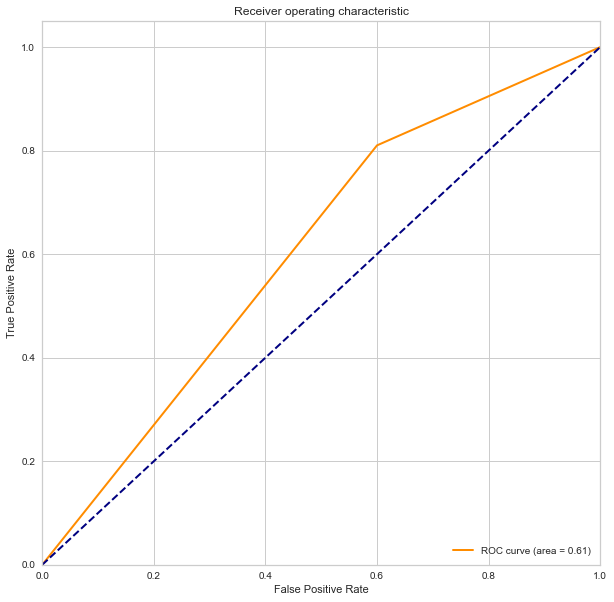

For classifier SVC, ROC score is 0.500000


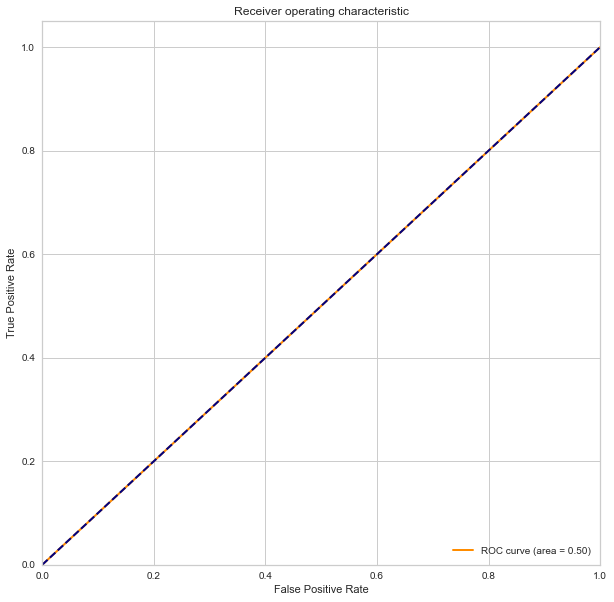

For classifier KNeighborsClassifier, ROC score is 0.676492


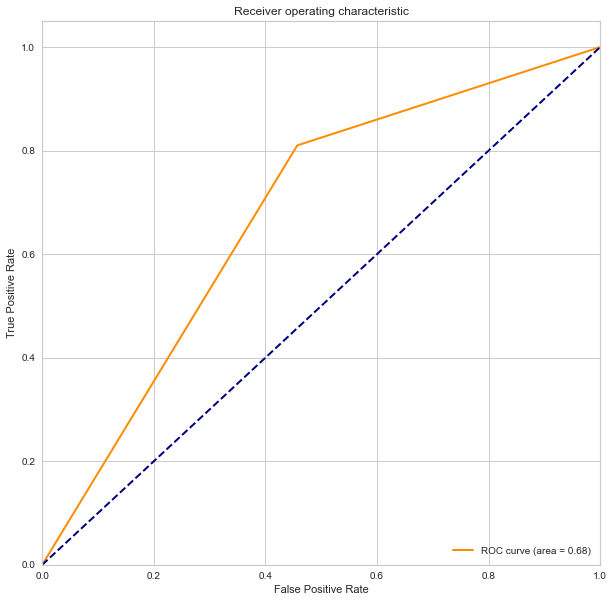

In [39]:
#plotting ROC curve

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    pred=clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    print("For classifier %s, ROC score is %f"%(clf_name,roc_auc))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
#fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

### Implementing XGBoost

In [40]:
# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'silent': 1
}

# Train XGBoost model
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=10,
    evals=[(dtrain, 'train')], 
    verbose_eval=False
)

# Predict on test data
y_pred = xgb_model.predict(dtest)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[19:54:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 0.6491228070175439


## Fine tuning the models

For classifier RandomForestClassifier:
Unoptimized model
------
Accuracy score on testing data: 0.6842
F-score on testing data: 0.7980

Optimized Model
------
Final accuracy score on the testing data: 0.7281
Final F-score on the testing data: 0.8971
Best parameters:
{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 15, 'oob_score': False}
For classifier RandomForestClassifier, ROC score is 0.588969


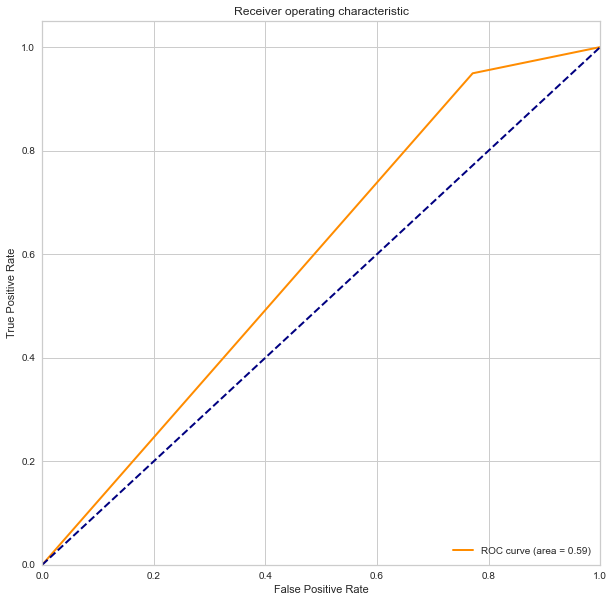


---------------------------------X----------------------------

For classifier SVC:
Unoptimized model
------
Accuracy score on testing data: 0.6930
F-score on testing data: 0.9186

Optimized Model
------
Final accuracy score on the testing data: 0.6930
Final F-score on the testing data: 0.9186
Best parameters:
{'C': 0.001, 'kernel': 'poly'}
For classifier SVC, ROC score is 0.500000


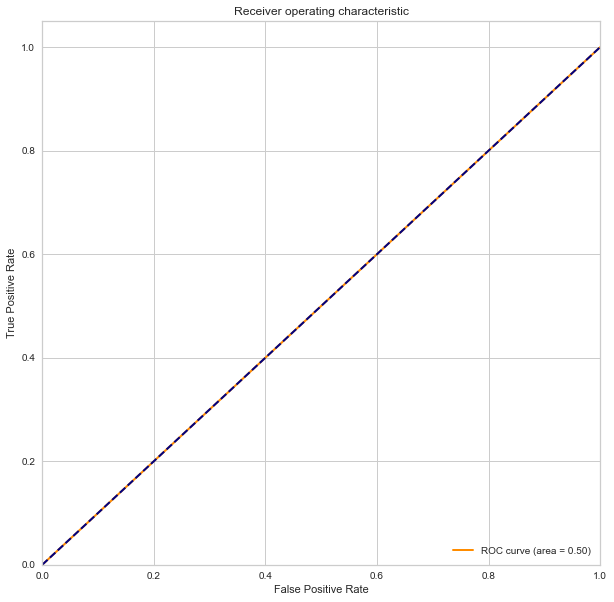


---------------------------------X----------------------------

For classifier KNeighborsClassifier:
Unoptimized model
------
Accuracy score on testing data: 0.7281
F-score on testing data: 0.8081

Optimized Model
------
Final accuracy score on the testing data: 0.7105
Final F-score on the testing data: 0.8537
Best parameters:
{'n_neighbors': 15, 'weights': 'uniform'}
For classifier KNeighborsClassifier, ROC score is 0.600181


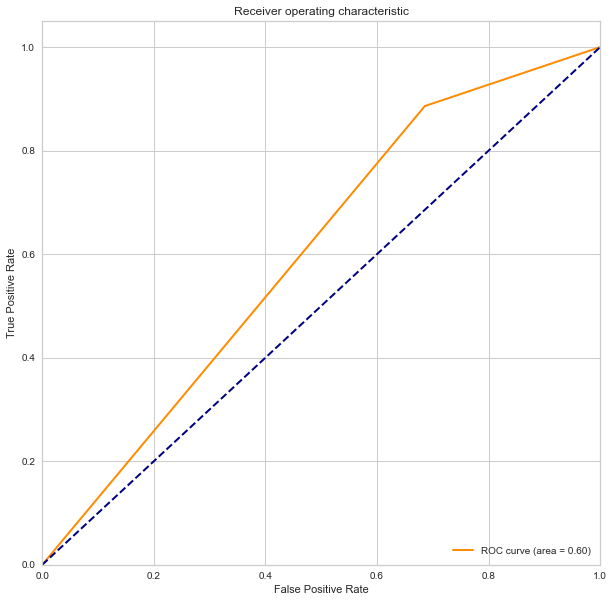


---------------------------------X----------------------------



In [41]:
# TODO: Initialize the classifier
i=0
clf_base = LogisticRegression(random_state=7)
clf_A = RandomForestClassifier(random_state=7)
clf_B = SVC(random_state=7)
clf_C = KNeighborsClassifier()

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print ('For classifier %s:'%(clf_name))
    if i==0: #RandomForest
        parameters = {'max_features':['auto',None],# 'auto' option uses square root of number of features
                     'oob_score':[False,True],# setting it to 'True' saves the generalization error
                     'max_depth':[3,10,15],# depth of tree
                     'n_estimators':[3,10,15]}# number of trees
    elif i==1: #SVM
        parameters={'kernel':['poly','rbf','linear'],# different ways to separate data pts by a hyperplane
                    'C':[0.001,1,1000]} # weight of penalty assigned to error
    elif i==2: #kNearestClassifier
        parameters={'n_neighbors':[5,10,15],# number of neighbors
                    'weights':['uniform','distance']}# distance means weights are inversely proportional to distance

    scorer = make_scorer(fbeta_score, beta=2)
    grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
    grid_fit = grid_obj.fit(X_train,y_train)
    best_clf = grid_fit.best_estimator_

    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    # Report the before-and-afterscores
    print ("Unoptimized model\n------")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
    print ("Best parameters:")
    print (grid_fit.best_params_)
    fpr, tpr, _ = roc_curve(y_test, best_predictions)
    roc_auc = auc(fpr, tpr)
    print ("For classifier %s, ROC score is %f"%(clf_name,roc_auc))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print ("\n---------------------------------X----------------------------\n")
    i+=1

In [42]:
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf = (clone(clf_A)).fit(X_train_reduced, y_train)#seeing how using only 5 best features affects RandomForestClassifier
predictions=clf_A.predict(X_test)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from Random Forest using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.6842
F-score on testing data: 0.7637

Final Model trained on reduced data
------
Accuracy on testing data: 0.6667
F-score on testing data: 0.7471


In [43]:
!pip install yellowbrick

## Extracting important features

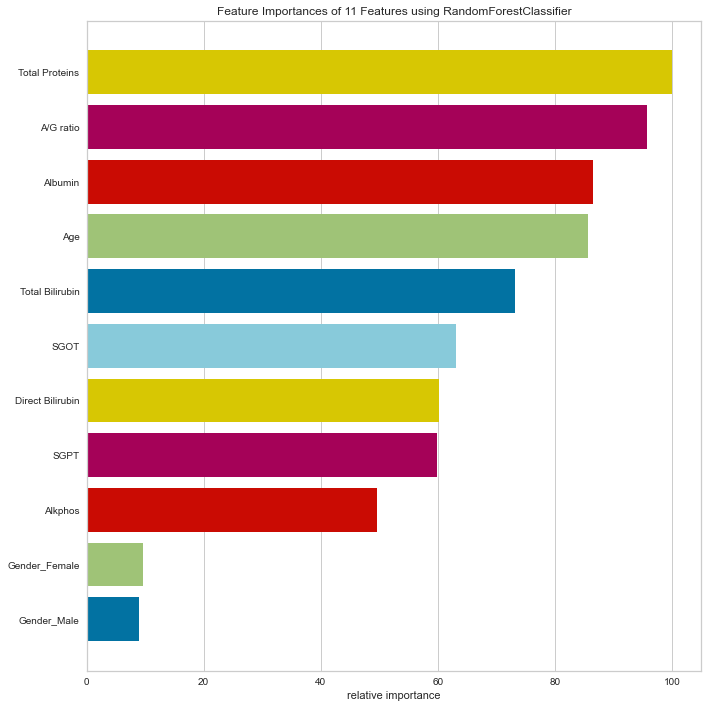

<AxesSubplot:title={'center':'Feature Importances of 11 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [44]:
clf_new = clf_A.fit(X_train,y_train)
im_features = clf_new.feature_importances_

viz = FeatureImportances(clf_new, labels=X_train.columns)
viz.fit(X_train, y_train)
viz.show()


In [45]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Create an XGBoost classifier object
xgb = XGBClassifier()

# Create a grid search object to search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}
Best score: 0.7521978021978022


# Conclusion and Future Direction
In conclusion, we have developed a machine learning model using XGBoost algorithm to predict liver disease with an accuracy of 75%. Our model outperformed the benchmark model (Logistic Regression) with an accuracy of 64%. The most important features for predicting liver disease were found to be total bilirubin, direct bilirubin, alkaline phosphatase, and aspartate aminotransferase. Further, we analyzed the feature importance using the SHAP values and found that the top contributing features were consistent with our initial findings.

For future direction, we can consider the following:
- Collecting more data: The dataset used in this project was relatively small, and collecting more data can improve the accuracy of the model.
- Feature engineering: Feature engineering involves creating new features or transforming existing features to improve the model's performance. We can explore more advanced feature engineering techniques such as principal component analysis (PCA) and nonlinear transformations.
- Ensemble methods: Ensemble methods such as bagging, boosting, and stacking can be used to combine multiple models to improve the accuracy of the prediction.
- Model interpretation: Interpreting the model can provide insights into how the model is making predictions. We can explore more advanced techniques such as LIME and SHAP values for better model interpretation.
- Clinical validation: Finally, the model should be clinically validated on a larger and more diverse dataset to assess its performance and generalizability.

# References:

[1]: Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. Annals of statistics, 29(5), 1189-1232.

[2]: Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.